### Data Importation 

In [2]:
# import libraries 

import pandas as pd 
import seaborn as sns 
import numpy as np 

import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plots 
pd.options.mode.chained_assignment = None 

# Read in the data 
df = pd.read_csv(r'C:\Users\TzeShuan\OneDrive\Documents\LinkedIn Learning\Data Analysis Reports\Data Analyst Portfolio Project (Covid)\movies.csv')

In [3]:
# Data 

df.head() # only show the first five records 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Data Exploration 

In [8]:
# Check the number of rows and columns
df.shape 

(7668, 15)

In [4]:
# Check the column labels 
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [11]:
# Summary Statistics 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [5]:
# check for missing data 

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))
    
    
# finding the null value using isna() and any() 
df.isna().any()

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.03%
score - 0.04%
votes - 0.04%
director - 0.0%
writer - 0.04%
star - 0.01%
country - 0.04%
budget - 28.31%
gross - 2.46%
company - 0.22%
runtime - 0.05%


name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [6]:
# return the number of missing values in each columns
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Handle missing value 
# Drop the rows with missing values in the specified columns

df.dropna(subset=['rating', 'released', 'score', 'votes', 'writer', 'star', 'country',
                 'budget', 'gross', 'company', 'runtime'], inplace = True)

In [19]:
# check for missing value 
df.isna().any()

name        False
rating      False
genre       False
year        False
released    False
score       False
votes       False
director    False
writer      False
star        False
country     False
budget      False
gross       False
company     False
runtime     False
dtype: bool

In [21]:
# Handling duplicate

df.duplicated().sum()

# Get the duplicate record 
df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [8]:
# Just for reference 
# dropping duplicate 

df.drop_duplicates(inplace = True) # the original DataFrame (df) is altered, and the changes are reflected directly in that DataFrame.
df.duplicated().sum()

0

In [23]:
# Checking column data type 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# data transformation 

df["budget"] = df["budget"].astype("int64")
df["gross"] = df["gross"].astype("int64")
df["votes"] = df["votes"].astype("int64")
df["runtime"] = df["runtime"].astype("int64")
df["genre"] = df["genre"].astype("category")
df["rating"] = df["rating"].astype("category")

In [25]:
df.dtypes

name          object
rating      category
genre       category
year           int64
released      object
score        float64
votes          int64
director      object
writer        object
star          object
country       object
budget         int64
gross          int64
company       object
runtime        int64
dtype: object

In [10]:
df.shape # notice that the dataset remain 5421 records after data wrangling 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100


In [27]:
# create a new column 
# store month 
df["released_month"] = df["released"].astype(str).str[:3] # extract the three letter of the column


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Jun
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Jul
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Jun
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Jul
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,Jan
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,Feb
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,Jan
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,Feb


In [11]:
# Replace value 
# no-rated to unrated in the rating column 
df['rating'] = df['rating'].replace({
    "Not Rated": "Unrated",
    "PG-13": "PG"
})

In [24]:
# Drop the 'released' column as I only need 'released_month'

df.drop(["released"],axis = 1, inplace = True)
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


### Data Analysis 

##### Top 10 highest-grossing movies of 2019-2020

In [30]:
# filter data to only include movies released in 2019-2020 
df_2019_2020 = df[df['year'].between(2019, 2020)]

# Sort the data by gross in descending order 
df_2019_2020 = df_2019_2020.sort_values(by = 'gross', ascending = False)

# Select Top 10 movies 
top_10_movies = df_2019_2020.head(10)
top_10_movies 

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_month
7445,Avengers: Endgame,PG,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,Apr
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,Jul
7494,Frozen II,PG,Animation,2019,6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,Nov
7458,Spider-Man: Far from Home,PG,Action,2019,7.5,359000,Jon Watts,Chris McKenna,Tom Holland,United States,160000000,1131927996,Columbia Pictures,129,Jul
7456,Captain Marvel,PG,Action,2019,6.8,478000,Anna Boden,Anna Boden,Brie Larson,United States,160000000,1128462972,Walt Disney Pictures,123,Mar
7463,Star Wars: Episode IX - The Rise of Skywalker,PG,Action,2019,6.5,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141,Dec
7450,Joker,R,Crime,2019,8.4,1000000,Todd Phillips,Todd Phillips,Joaquin Phoenix,United States,55000000,1074427370,Warner Bros.,122,Oct
7488,Toy Story 4,G,Animation,2019,7.7,217000,Josh Cooley,John Lasseter,Tom Hanks,United States,200000000,1073394593,Pixar Animation Studios,100,Jun
7481,Aladdin,PG,Adventure,2019,6.9,239000,Guy Ritchie,John August,Will Smith,United Kingdom,183000000,1050693953,Walt Disney Pictures,128,May
7467,Jumanji: The Next Level,PG,Action,2019,6.6,204000,Jake Kasdan,Jake Kasdan,Dwayne Johnson,United States,125000000,800059707,Columbia Pictures,123,Dec


Notice that majority of the genre are Action 

##### Relationship between budget and gross 

0.7402465439219631


<function matplotlib.pyplot.show(close=None, block=None)>

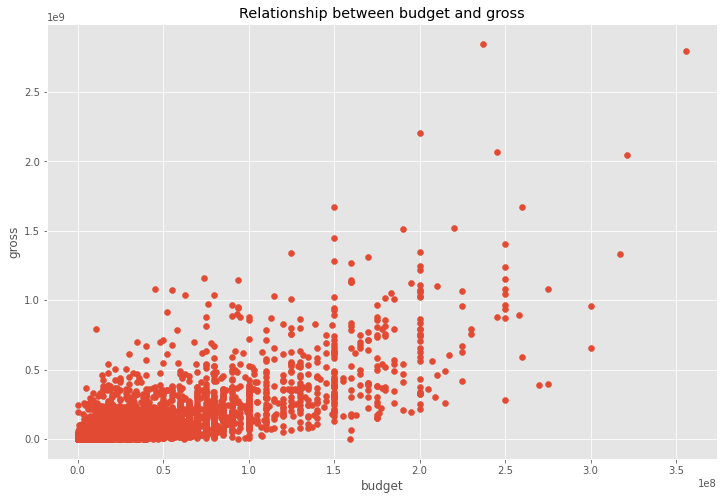

In [31]:
# Correlation between gross and marketing budget 
budget_gross_corr = df['budget'].corr(df['gross'])
print(budget_gross_corr) # 0.740

# Scatter plot between gross and budget 
plt.scatter(df['budget'], df['gross'])
plt.xlabel('budget')
plt.ylabel('gross')
plt.title('Relationship between budget and gross')
plt.show 

-The correlation is considered quite strong with 0.74, and evident by the linear pattern from the scatter plot. 
-The scatter plot shows a positive relationship between budget and gross, indicating that as budget increases, gross also tends to increase. 

##### Rating proportion for movies 

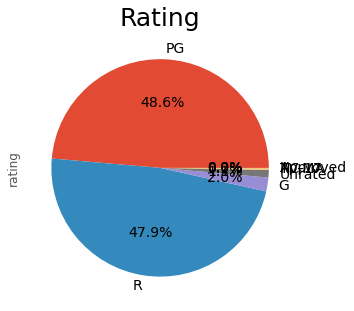

In [33]:
# Create a pie chart of the rating column, retrieve the percentage rating of movies 

plt.figure(figsize=(10,5))
#the figure size is set to 10 inches in width and 5 inches in height.

df['rating'].value_counts().plot.pie(autopct="%1.1f%%", fontsize=14 )
# calculates the count of unique values in the 'rating' column 
# The autopct parameter specifies the format for displaying percentages on each pie wedge. 


# Title of the chart and font size 
plt.title('Rating', fontsize=25)

plt.show()

The pie chart shows that the most common rating for movies is PG. 
This suggests that the majority of movies are appropriate for general audiences with parental guidance. 

##### Average budget of movies changed over time

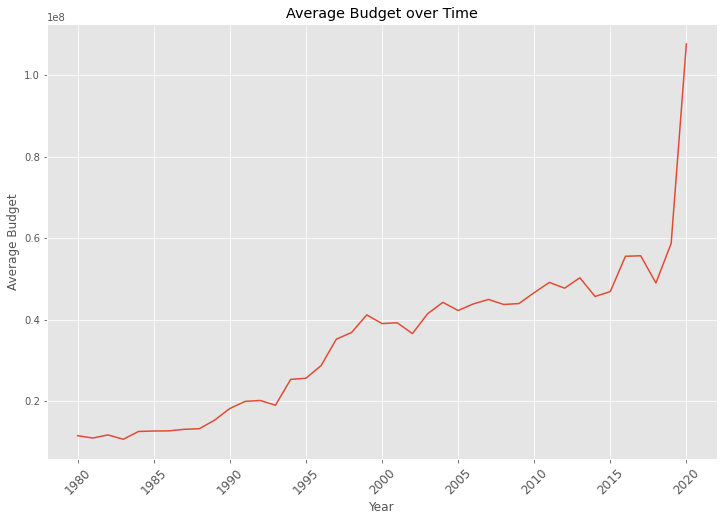

In [23]:
# Group data by year and calculate the average budget for each year 
year_budget = df.groupby('year')['budget'].mean()

# Line chart 
plt.plot(year_budget.index, year_budget)
plt.xlabel('Year')
plt.ylabel('Average Budget')
plt.xticks(rotation = 45) # rotate the x-axis labels 
plt.xticks(fontsize = 12) # increase the font size of x-axis labels
plt.title('Average Budget over Time')
plt.show()

The line chart shows that the upward trend of average budget since 1980. However a subtantial increase from 2019 to 2020. 

##### Gross Earnings vs the season 

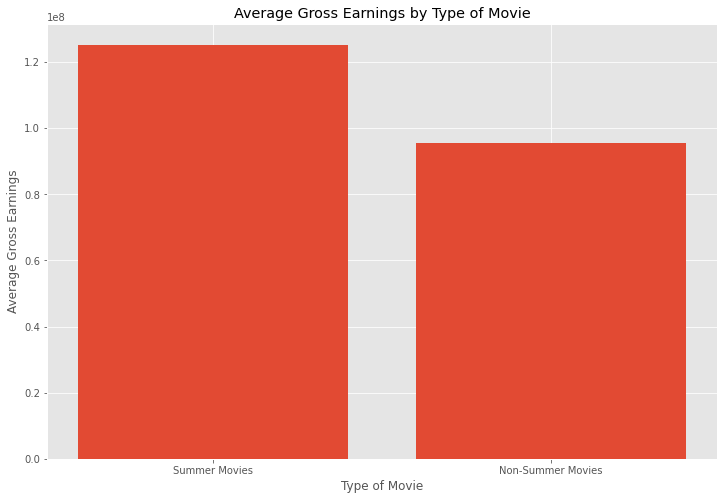

In [40]:
# Filter data to only include movies released in the summer months (Jun-Aug)
summer_movies = df[df['released_month'].isin(['Jun', 'Jul', 'Aug'])]

# Calculate the average gross earnings for summer movies 
summer_movies_gross_earnings = summer_movies['gross'].mean()

# Filter data to only include movies released in the non-summer months 
non_summer_movies = df[~df['released_month'].isin(['Jun', 'Jul', 'Aug'])]

# Calculate the average gross earnings for summer movies 
non_summer_movies_gross_earnings = non_summer_movies['gross'].mean()

# Bar chart 
plt.bar(['Summer Movies', 'Non-Summer Movies'], 
        [summer_movies_gross_earnings, non_summer_movies_gross_earnings])

plt.xlabel('Type of Movie')
plt.ylabel('Average Gross Earnings')
plt.title('Average Gross Earnings by Type of Movie')
plt.show()

The bar graph shows that movies released in the summers are more likely to have high gross earnings.

##### Average score for each genre 

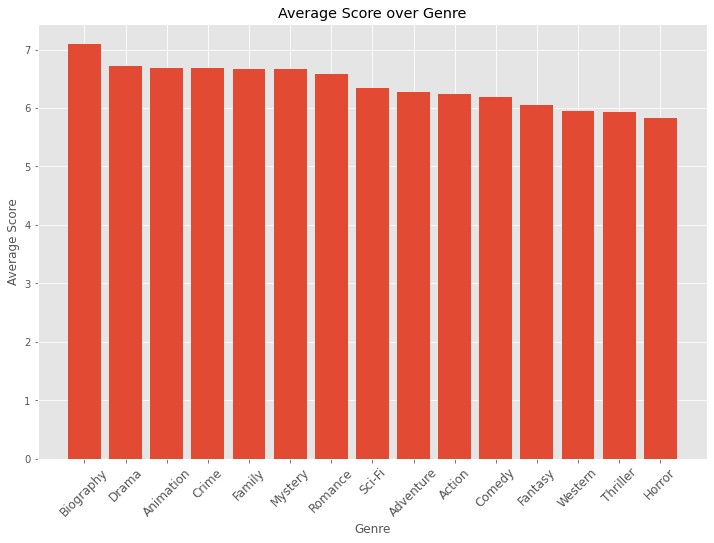

In [41]:
# Group the data by genre and calculate the average score for each genre
genre_scores = df.groupby('genre')['score'].mean()

# Sort the genre rating in descending order 
genre_scores = genre_scores.sort_values(ascending = False)

# Bar Chart 
plt.bar(genre_scores.index, genre_scores)
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation = 45) # rotate the x-axis labels 
plt.xticks(fontsize = 12) # increase the font size of x-axis labels
plt.title('Average Score over Genre')
plt.show()

The graph shows that the highest average score genre is Biography, followed by Drama and Animation 
The genre with the lowest average score are Western, Thriller, Horror. 

##### Gross vs Budget 

<AxesSubplot:xlabel='gross', ylabel='budget'>

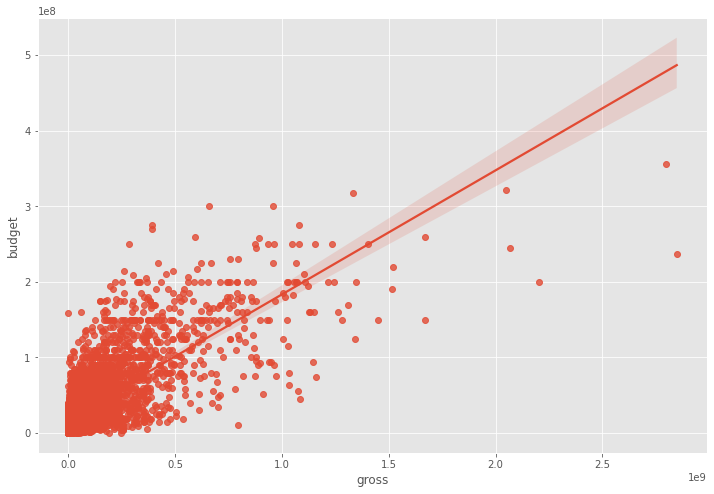

In [12]:
# Regression plot 
sns.regplot(x = "gross", y = "budget", data = df)

##### Gross vs Score 

<AxesSubplot:xlabel='score', ylabel='gross'>

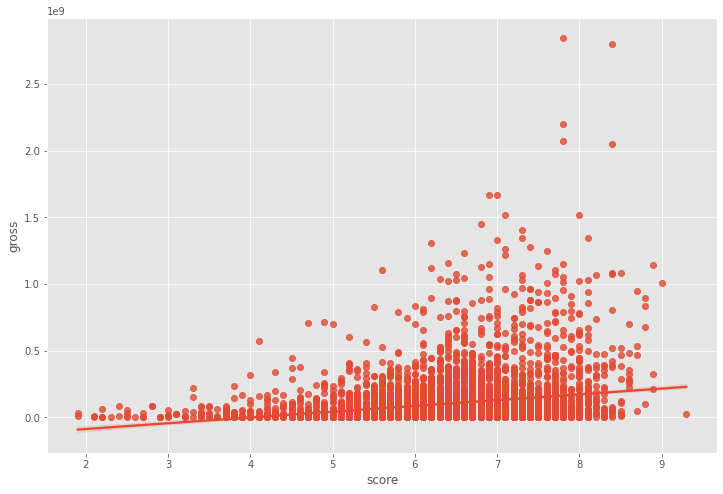

In [13]:
sns.regplot(x = "score", y = "gross", data = df)

Seems like the gross earning of movie does not relate much with the score.

##### Correlation Matrix 

In [15]:
# Correlation matrix for all numeric columns 
df.corr(method ='pearson')

# Pearson, used for two quantitative continuous variables which have a linear relationship.

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [16]:
df.corr(method ='kendall')

#used to estimate a rank-based measure of association. 

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [17]:
df.corr(method = 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


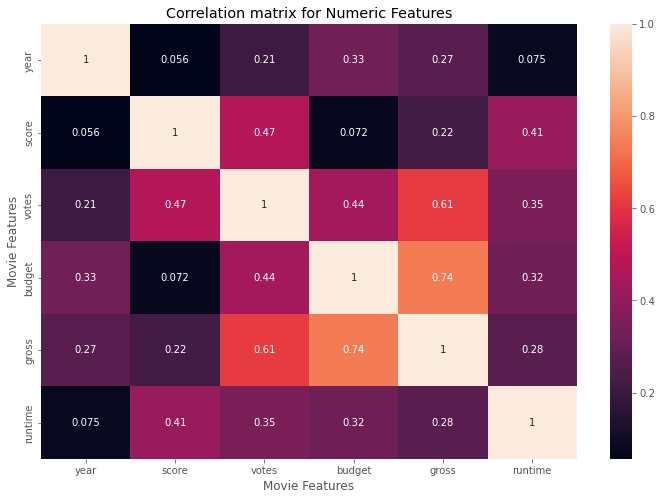

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

From the correlation matrix, it can be observed than budget and votes are strongly correlated with the gross earnings of the movie. It suggests a strong positive linear relationship. This means that as the budget increases, the gross earnings tend to increase. 

Similarly, a higher number of votes may be indicative of a movie that has reached a larger audience, and this larger audience may contribute to higher gross earnings.

##### Top 15 companies by gross revenue 

In [20]:
# Top 15 companies by gross revenue 

#  Group by 
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

# Filter to extract only the top 15 countries
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


In [21]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

In [22]:
# Top 15 companies by gross revenue with release year

#  Group by 
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

# Filter to extract only the top 15 countries
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted

,,gross
company,year,
Walt Disney Pictures,2019,5773131804
Marvel Studios,2018,4018631866
Universal Pictures,2015,3834354888
Twentieth Century Fox,2009,3793491246
Walt Disney Pictures,2017,3789382071
Paramount Pictures,2011,3565705182
Warner Bros.,2011,3223799224
Walt Disney Pictures,2010,3104474158
Paramount Pictures,2014,3071298586


### Conclusion

Based on the analysis, several facts can be highlighted from the data set. Firstly, the budget and votes are positively strongly correlated to the gross earnings of the movies. 

Secondly, the average budget of movies has increased significantly over time, from 1980 to 2020. Notably, a substantial increase of average budget happened from between the year of 2019 to 2020. This increase in budget can be attributed to a variety of factors, including the increasing cost of technology and special effects, the increasing competition among studios, and the increasing globalization of the movie industry.

Thirdly, the most common rating for movies is PG, suggesting that the majority of movies are appropriate for general audiences with parental guidance. 

Fourthly, the genres with the highest average score in the dataset are Biography, Drama and Animation. 

Lastly, movies that are released in the summers are more likely sought after and produce higher gross earning than movies that are released in other months. 

The correlation matrix suggests that numerous factors could affect the gross earning of the movies such as budget, votes, genre, and release date.